In [2]:
# Path of the file to read
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# 그래프 한글 설정
plt.rc("font", family = "Malgun Gothic")
sb.set(font="Malgun Gothic",
rc={"axes.unicode_minus":False}, style='white')

In [4]:
# 사용될 영웅, 티어 리스트 
Tier = ["All", "Bronze", "Silver", "Gold", "Platinum", "Diamond", "Master", "Grandmaster"]
Dag_heroes = ['Cassidy', 'Genji', 'Hanzo', 'Widowmaker', 'Soldier: 76',
              'Junkrat', 'Ashe', 'Tracer', 'Reaper', 'Pharah', 'Mei', 'Bastion',
              'Sombra', 'Sojourn', 'Symmetra', 'Torbjorn', 'Echo'] #17명
Dag_heroes_mean = ['Cassidy', 'Genji', 'Hanzo', 'Widowmaker', 'Soldier: 76',
              'Junkrat', 'Ashe', 'Tracer', 'Reaper', 'Pharah', 'Mei', 'Bastion',
              'Sombra', 'Sojourn', 'Symmetra', 'Torbjorn', 'Echo', 'mean'] #18개

In [5]:
# 게임 출시 이후 ~ 랭크 전 데이터
ow2_data_0_path = "../data_project/data/ow2_quickplay_heroes_stats.csv"
ow2_data_0 = pd.read_csv(ow2_data_0_path, index_col= "Role")
ow2_data_0

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,...,Annihilation Kills / 10min,"Jagged Blade Accuracy, %",Carnage Kills / 10min,"Wound Uptime, %",Rampage Kills / 10min,"Focusing Beam Accuracy, %",Focusing Beam Kills / 10min,"Sticky Bomb Accuracy, %",Sticky Bomb Kills / 10min,Duplicate Kills / 10min
Role,,,,,,,,,,,,,,,,,,,,,
Support,Ana,All,4.91,7.75,48.73,9.80,3.93,53,2641,7278.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Support,Ana,Bronze,4.29,6.05,47.17,9.12,3.75,53,2483,6819.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Support,Ana,Silver,4.33,5.77,47.27,9.19,3.80,53,2505,6829.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Support,Ana,Gold,4.45,6.01,47.54,9.37,3.86,54,2542,6958.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Support,Ana,Platinum,4.70,7.06,47.94,9.60,3.91,53,2575,7168.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Damage,Echo,Gold,2.86,0.81,50.03,18.56,6.75,58,7922,NaN,...,NaN,NaN,NaN,NaN,NaN,37.41,7.02,26.0,8.46,3.35
Damage,Echo,Platinum,2.95,0.88,50.41,19.12,6.76,57,8200,NaN,...,NaN,NaN,NaN,NaN,NaN,38.21,7.31,26.0,8.71,3.52
Damage,Echo,Diamond,3.07,0.95,50.50,19.48,6.72,55,8400,NaN,...,NaN,NaN,NaN,NaN,NaN,39.06,7.44,26.0,8.84,3.66


In [6]:
#역할군이 딜러 분류되어 있는 애들만 추출해오기
ow2_data_0_dag = ow2_data_0.loc[ow2_data_0.index == "Damage"]
ow2_data_0_dag

#일반적인 지표 값만 가져오기 ~11, 컬럼12 이후로는 캐릭터 별 스킬에 대한 수치가 나타나있음. ex) 궁극기 사용 횟수
ow2_ss0_dag = ow2_data_0_dag[ow2_data_0_dag.columns[:5]]
ow2_ss0_dag

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %"
Role,,,,,
Damage,Cassidy,All,2.48,4.31,45.39
Damage,Cassidy,Bronze,2.25,3.68,45.16
Damage,Cassidy,Silver,2.27,3.56,45.20
Damage,Cassidy,Gold,2.33,3.66,45.16
Damage,Cassidy,Platinum,2.41,4.20,45.28
...,...,...,...,...,...
Damage,Echo,Gold,2.86,0.81,50.03
Damage,Echo,Platinum,2.95,0.88,50.41
Damage,Echo,Diamond,3.07,0.95,50.50


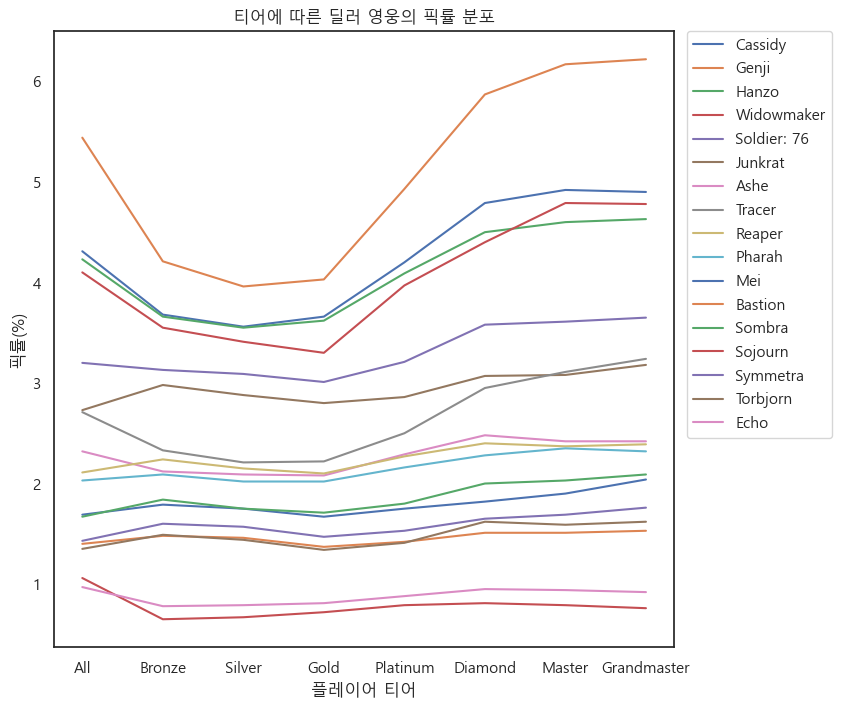

In [7]:
# 픽률 그래프 그리기
# 반복문으로 코드 압축
plt.figure(figsize=(8,8))
for hero in Dag_heroes:
    ow2_dag_fisrt_hero = ow2_ss0_dag[ow2_ss0_dag["Hero"] == hero]
    plt.plot(ow2_dag_fisrt_hero["Skill Tier"],
             ow2_dag_fisrt_hero["Pick Rate, %"],
             label=hero)

plt.xlabel("플레이어 티어")
plt.ylabel("픽률(%)")
plt.title("티어에 따른 딜러 영웅의 픽률 분포")
plt.legend(Dag_heroes, loc=[1.02,0.34])

plt.show()

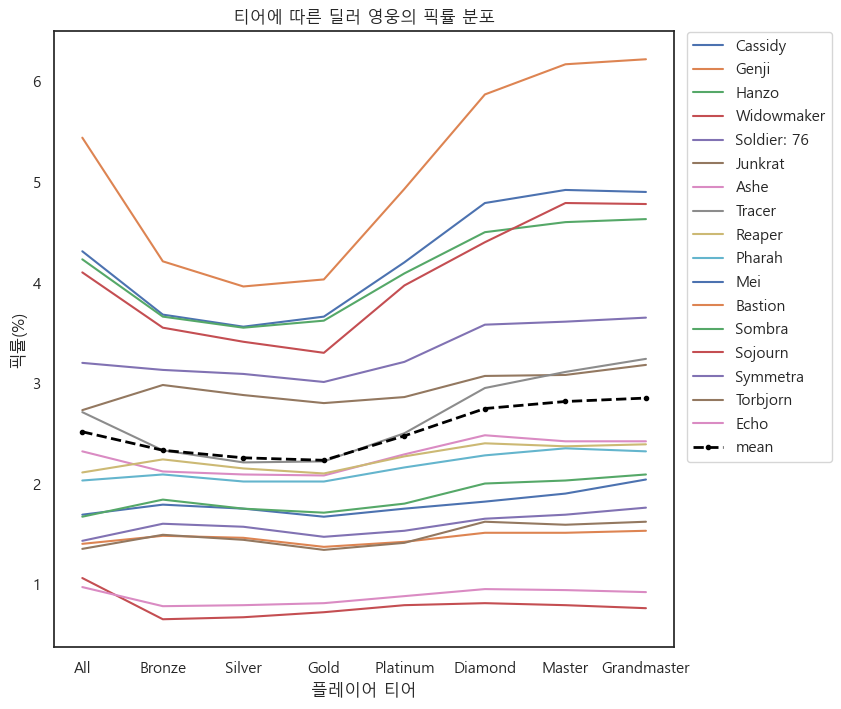

In [8]:
# 픽률 그래프 그리기 (평균치 있음@@)
# 반복문으로 코드 압축
plt.figure(figsize=(8,8))
for hero in Dag_heroes:
    ow2_sup_fisrt_hero = ow2_ss0_dag[ow2_ss0_dag["Hero"] == hero]
    plt.plot(ow2_sup_fisrt_hero["Skill Tier"], ow2_sup_fisrt_hero["Pick Rate, %"], label=hero)

#평균치 그리기
no_sort_mean = ow2_ss0_dag["Pick Rate, %"].groupby(ow2_ss0_dag["Skill Tier"]).mean()
sort_mean_PickRate = no_sort_mean.reindex(Tier)
plt.plot(sort_mean_PickRate, linestyle='dashed', linewidth=2, color='black', marker='o', markersize=3 )

plt.xlabel("플레이어 티어")
plt.ylabel("픽률(%)")
plt.title("티어에 따른 딜러 영웅의 픽률 분포")
plt.legend(Dag_heroes_mean, loc=[1.02,0.3])

plt.show()

In [9]:
for hero in Dag_heroes:
    ow2_sup_fisrt_hero = ow2_ss0_dag[ow2_ss0_dag["Hero"] == hero]
    print(hero, "의 전 구간 평균 픽률",ow2_sup_fisrt_hero["Pick Rate, %"][0])

# Tier = ["All", "Bronze", "Silver", "Gold", "Platinum", "Diamond", "Master", "Grandmaster"]
#평균 구하기
no_sort_mean = ow2_ss0_dag["Pick Rate, %"].groupby(ow2_ss0_dag["Skill Tier"]).mean()
sort_mean_PickRate = no_sort_mean.mean()
print("평균 픽률" ,sort_mean_PickRate)

Cassidy 의 전 구간 평균 픽률 4.31
Genji 의 전 구간 평균 픽률 5.44
Hanzo 의 전 구간 평균 픽률 4.23
Widowmaker 의 전 구간 평균 픽률 4.1
Soldier: 76 의 전 구간 평균 픽률 3.2
Junkrat 의 전 구간 평균 픽률 2.73
Ashe 의 전 구간 평균 픽률 2.32
Tracer 의 전 구간 평균 픽률 2.71
Reaper 의 전 구간 평균 픽률 2.11
Pharah 의 전 구간 평균 픽률 2.03
Mei 의 전 구간 평균 픽률 1.69
Bastion 의 전 구간 평균 픽률 1.4
Sombra 의 전 구간 평균 픽률 1.67
Sojourn 의 전 구간 평균 픽률 1.06
Symmetra 의 전 구간 평균 픽률 1.43
Torbjorn 의 전 구간 평균 픽률 1.35
Echo 의 전 구간 평균 픽률 0.97
평균 픽률 2.527279411764706


In [10]:
#평균 구하기
no_sort_mean = ow2_ss0_dag["Pick Rate, %"].groupby(ow2_ss0_dag["Skill Tier"]).mean()
average_pick_rate = no_sort_mean.mean()

# 높은 평균 픽률을 가진 히어로와 낮은 평균 픽률을 가진 영웅 분리
high_pick_heroes = []
low_pick_heroes = []

for hero in Dag_heroes:
    ow2_sup_first_hero = ow2_ss0_dag[ow2_ss0_dag["Hero"] == hero]
    hero_pick_rate_mean = ow2_sup_first_hero["Pick Rate, %"].mean()
    
    if hero_pick_rate_mean > average_pick_rate:
        high_pick_heroes.append(hero)
    else:
        low_pick_heroes.append(hero)

# 결과 출력
print("평균 픽률이 높은 히어로들:", high_pick_heroes)
print("평균 픽률이 낮은 히어로들:", low_pick_heroes)


평균 픽률이 높은 히어로들: ['Cassidy', 'Genji', 'Hanzo', 'Widowmaker', 'Soldier: 76', 'Junkrat', 'Tracer']
평균 픽률이 낮은 히어로들: ['Ashe', 'Reaper', 'Pharah', 'Mei', 'Bastion', 'Sombra', 'Sojourn', 'Symmetra', 'Torbjorn', 'Echo']


In [11]:
# 반복되는 코드 :: 승률과 픽률에 대한 평균치 구하기.

#픽률 평균
no_sort_mean = ow2_ss0_dag["Pick Rate, %"].groupby(ow2_ss0_dag["Skill Tier"]).mean()
sort_mean_PickRate = no_sort_mean.reindex(Tier)

#승률 평균
no_sort_mean = ow2_ss0_dag["Win Rate, %"].groupby(ow2_ss0_dag["Skill Tier"]).mean()
sort_mean_WinRate = no_sort_mean.reindex(Tier)

# "Skill Tier"이 "Bronze", "Silver", "Gold", "Platinum"인 행들만 필터링
low_tiers = ["Bronze", "Silver", "Gold", "Platinum"]

# "Skill Tier"이 "Bronze", "Silver", "Gold", "Platinum"인 행들만 필터링
high_tiers = ["Diamond", "Master", "Grandmaster"]

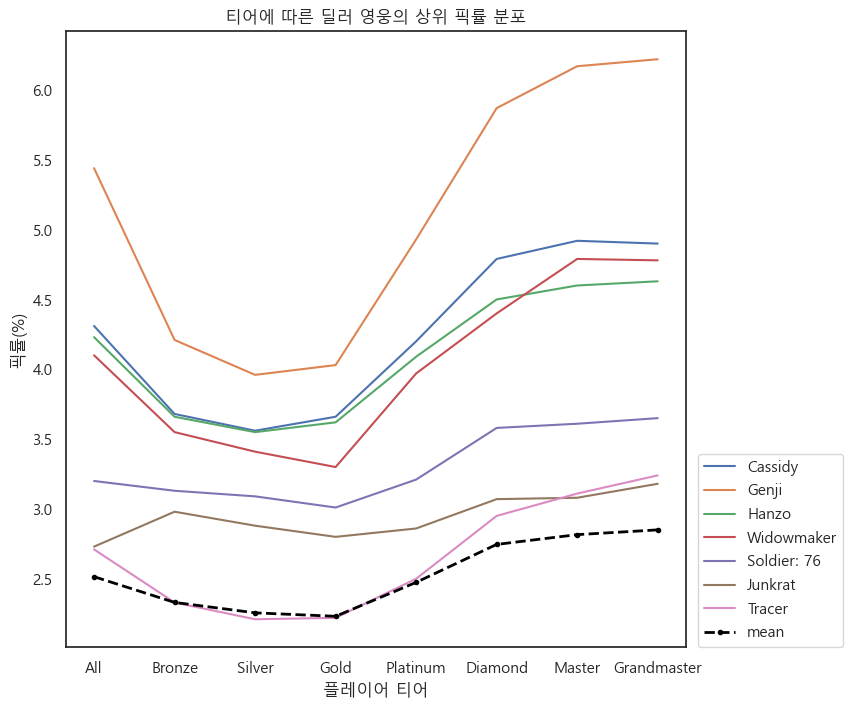

In [12]:
# 상위 픽률 그래프 그리기 (평균치 있음)
# 반복문으로 코드 압축
plt.figure(figsize=(8,8))
for hero in high_pick_heroes:
    ow2_sup_fisrt_hero = ow2_ss0_dag[ow2_ss0_dag["Hero"] == hero]
    plt.plot(ow2_sup_fisrt_hero["Skill Tier"], ow2_sup_fisrt_hero["Pick Rate, %"], label=hero)

#평균치 그리기
plt.plot(sort_mean_PickRate, linestyle='dashed', linewidth=2, color='black', marker='o', markersize=3 )

high_pick_heroes_mean = []
high_pick_heroes_mean = high_pick_heroes.copy() #원형값에 mean값 추가
high_pick_heroes_mean.append('mean')
plt.legend(high_pick_heroes_mean, loc=[1.02,0])

plt.xlabel("플레이어 티어")
plt.ylabel("픽률(%)")
plt.title("티어에 따른 딜러 영웅의 상위 픽률 분포")
plt.show()

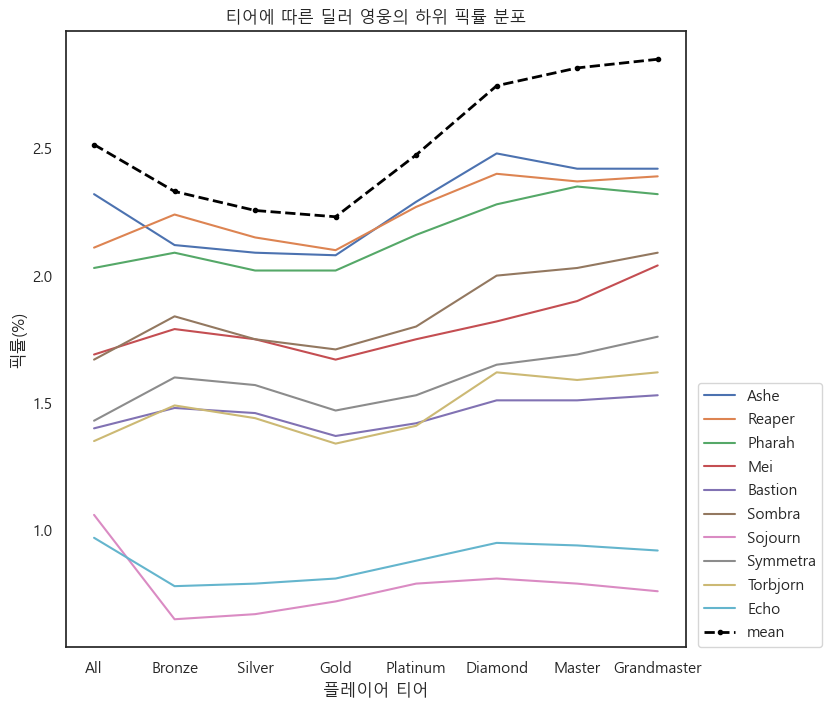

In [13]:
# 하위 픽률 그래프 그리기 (평균치 있음@@)
# 반복문으로 코드 압축
plt.figure(figsize=(8,8))
for hero in low_pick_heroes:
    ow2_sup_fisrt_hero = ow2_ss0_dag[ow2_ss0_dag["Hero"] == hero]
    plt.plot(ow2_sup_fisrt_hero["Skill Tier"], ow2_sup_fisrt_hero["Pick Rate, %"], label=hero)

#평균치 그리기
plt.plot(sort_mean_PickRate, linestyle='dashed', linewidth=2, color='black', marker='o', markersize=3 )

low_pick_heroes_mean = [] #리스트 초기화, 밑에서 append 하기 떄문이
low_pick_heroes_mean = low_pick_heroes.copy() #원형값에 mean값 추가
low_pick_heroes_mean.append('mean')
plt.legend(low_pick_heroes_mean, loc=[1.02,0])

plt.xlabel("플레이어 티어")
plt.ylabel("픽률(%)")
plt.title("티어에 따른 딜러 영웅의 하위 픽률 분포")

plt.show()

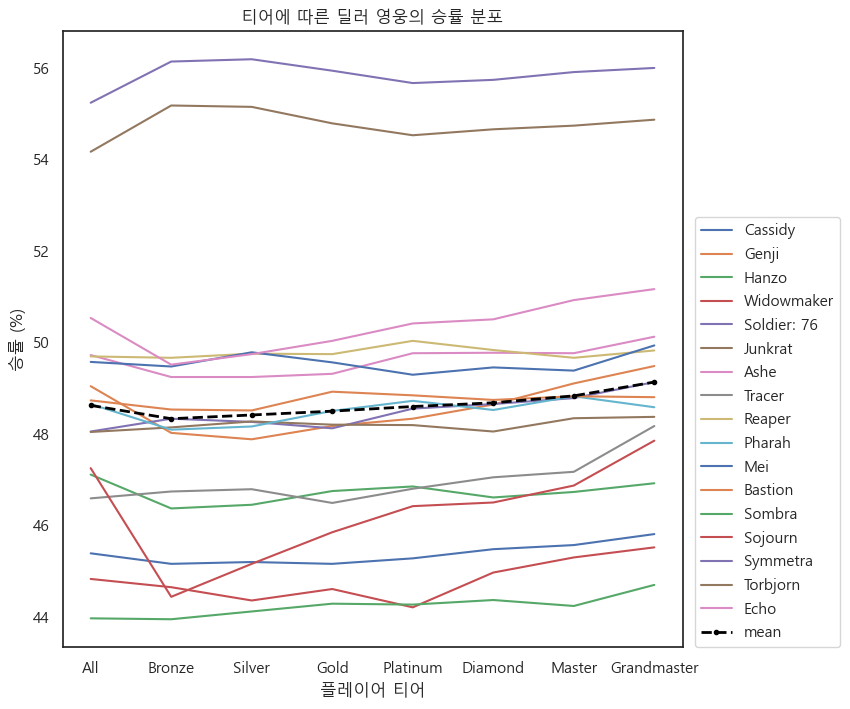

In [14]:
#승률 그래프 그리기
# 반복문으로 코드 압축
plt.figure(figsize=(8,8))
for hero in Dag_heroes:
    ow2_sup_fisrt_hero = ow2_ss0_dag[ow2_ss0_dag["Hero"] == hero]
    plt.plot(ow2_sup_fisrt_hero["Skill Tier"], ow2_sup_fisrt_hero["Win Rate, %"], label=hero)

#승률 평균치 그리기
plt.plot(sort_mean_WinRate, linestyle='dashed', linewidth=2, color='black', marker='o', markersize=3)


plt.xlabel("플레이어 티어")
plt.ylabel("승률 (%)")
plt.title("티어에 따른 딜러 영웅의 승률 분포")
plt.legend(Dag_heroes_mean, loc=[1.02,0])
plt.show()

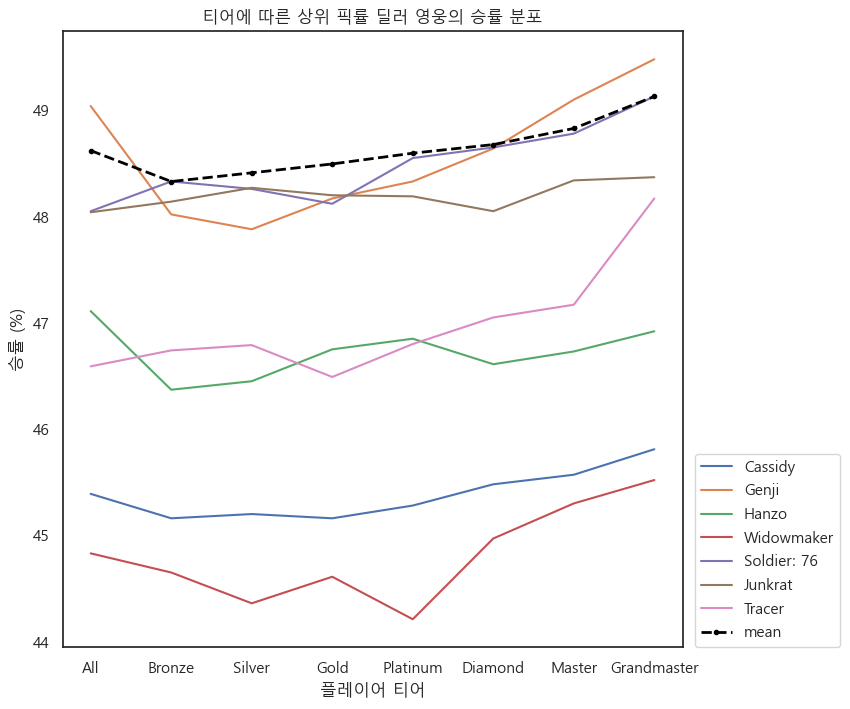

In [15]:
#승률 그래프 그리기
# 반복문으로 코드 압축
plt.figure(figsize=(8,8))
for hero in high_pick_heroes:
    ow2_sup_fisrt_hero = ow2_ss0_dag[ow2_ss0_dag["Hero"] == hero]
    plt.plot(ow2_sup_fisrt_hero["Skill Tier"], ow2_sup_fisrt_hero["Win Rate, %"], label=hero)

#승률 평균치 그리기
plt.plot(sort_mean_WinRate, linestyle='dashed', linewidth=2, color='black', marker='o', markersize=3)


plt.xlabel("플레이어 티어")
plt.ylabel("승률 (%)")
plt.title("티어에 따른 상위 픽률 딜러 영웅의 승률 분포")

high_pick_heroes_mean = []
high_pick_heroes_mean = high_pick_heroes.copy() #원형값에 mean값 추가
high_pick_heroes_mean.append('mean')
plt.legend(high_pick_heroes_mean, loc=[1.02,0])
plt.show()

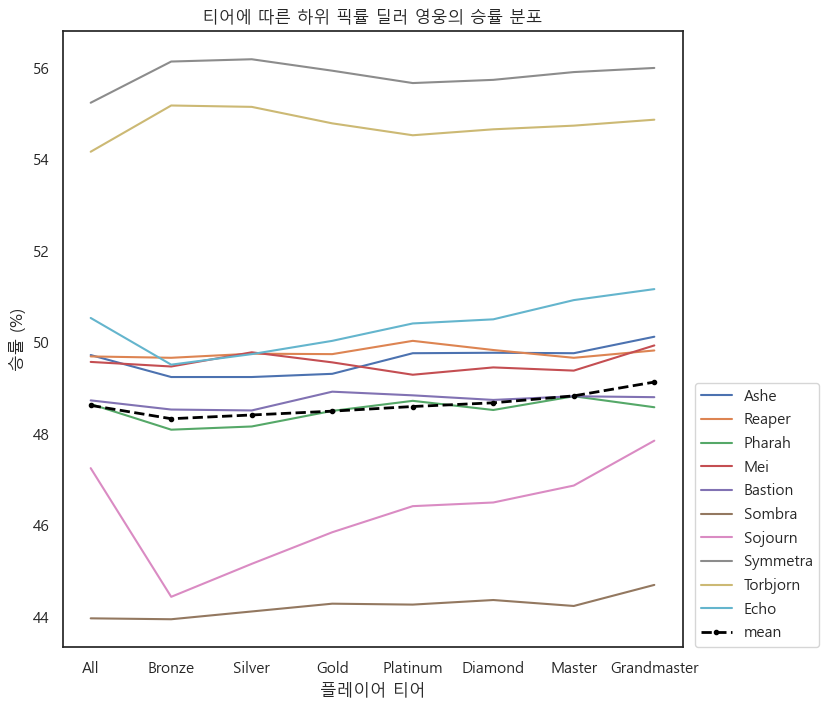

In [16]:
#승률 그래프 그리기
# 반복문으로 코드 압축
plt.figure(figsize=(8,8))
for hero in low_pick_heroes:
    ow2_sup_fisrt_hero = ow2_ss0_dag[ow2_ss0_dag["Hero"] == hero]
    plt.plot(ow2_sup_fisrt_hero["Skill Tier"], ow2_sup_fisrt_hero["Win Rate, %"], label=hero)

#평균치 그리기
plt.plot(sort_mean_WinRate, linestyle='dashed', linewidth=2, color='black', marker='o', markersize=3)


plt.xlabel("플레이어 티어")
plt.ylabel("승률 (%)")
plt.title("티어에 따른 하위 픽률 딜러 영웅의 승률 분포")

low_pick_heroes_mean = []
low_pick_heroes_mean = low_pick_heroes.copy() #원형값에 mean값 추가
low_pick_heroes_mean.append('mean')
plt.legend(low_pick_heroes_mean, loc=[1.02,0])
plt.show()

In [17]:
#딜량 평균 구하기
Deal_mean = ow2_ss0_dag["Damage / 10min"].groupby(ow2_ss0_dag["Hero"]).mean()
print(Deal_mean)
# 그래프 그리기
plt.figure(figsize=(8, 8))  
sb.barplot(x =Dag_heroes, y=Deal_mean)
plt.xticks(rotation=45)  # ha는 라벨의 정렬을 조절합니다.
plt.ylim(4000, 10000)  #가시성을 위해 5천이하의 값 삭제
plt.xlabel("영웅")
plt.ylabel("딜량 / 10분")
plt.title("딜러 캐릭별 10분당 딜량")

KeyError: 'Damage / 10min'

0.053488372093023255 0.041541267669858634 0.9049703602371181
1.0
5.829882352941176
5.83


Text(0.5, 1.0, '정규화 기반 승률 꿀영웅 수치')

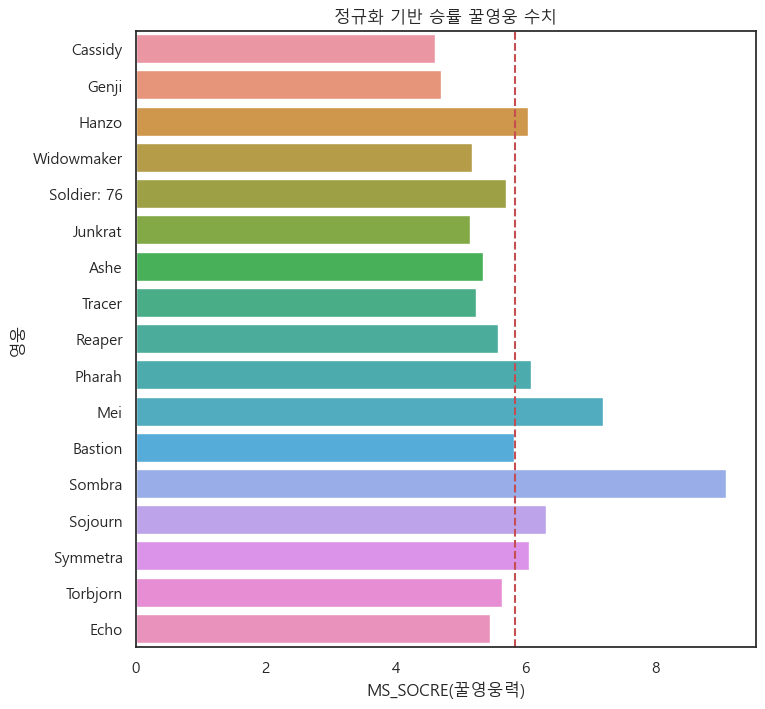

In [ ]:
# 정규화 데이터 + 승률값을 기준으로 영웅들의 평가 수치를 그리기.
KDA_ = ow2_ss0_dag["KDA Ratio"].groupby(ow2_ss0_dag["Hero"]).mean()
PICK_ = ow2_ss0_dag["Pick Rate, %"].groupby(ow2_ss0_dag["Hero"]).mean()
WIN_ = ow2_ss0_dag["Win Rate, %"].groupby(ow2_ss0_dag["Hero"]).mean()

MS_SCORE_list = []
# 정규화 승률 / (승률+픽률+KDA 비중)  print(KDA_.loc['Ashe'])
for hero in Dag_heroes :
    MS_AVG = [hero, round(KDA_.loc[hero] / (KDA_.loc[hero] + PICK_.loc[hero] + WIN_.loc[hero]) * 100, 3)]
    MS_SCORE_list.append(MS_AVG)
    #print(round(KDA_.loc['Ashe'] / (KDA_.loc['Ashe'] + PICK_.loc['Ashe'] + WIN_.loc['Ashe']) * 100, 3))

a = (KDA_.loc['Ashe'] / (KDA_.loc['Ashe'] + PICK_.loc['Ashe'] + WIN_.loc['Ashe']) )
b = (PICK_.loc['Ashe'] / (KDA_.loc['Ashe'] + PICK_.loc['Ashe'] + WIN_.loc['Ashe']))
c = (WIN_.loc['Ashe'] / (KDA_.loc['Ashe'] + PICK_.loc['Ashe'] + WIN_.loc['Ashe']))

print( a, b, c )
print ( a+b+c)

# 리스트 출력
# for item in MS_SCORE_list:
#     print(item)

# 빈 데이터프레임 생성
MS_honey = pd.DataFrame(columns=['Hero', 'MS_SCORE'])
MS_honey = pd.concat([pd.Series(item, index=['Hero', 'MS_SCORE']) for item in MS_SCORE_list], axis=1).T
MS_honey_mean = MS_honey["MS_SCORE"].mean()
print(MS_honey_mean)
print(round(MS_honey_mean,3))

# 그래프 그리기
plt.figure(figsize=(8, 8))  
sb.barplot(y = 'Hero', x= 'MS_SCORE', data= MS_honey)
plt.axvline(x = MS_honey_mean, color='r', linestyle='--', label='x=5')
plt.xlabel("MS_SOCRE(꿀영웅력)")
plt.ylabel("영웅")
plt.title("정규화 기반 승률 꿀영웅 수치")

           Hero MS_SCORE
0       Cassidy    4.608
1         Genji    4.698
2         Hanzo    6.037
3    Widowmaker    5.167
4   Soldier: 76    5.688
5       Junkrat    5.144
6          Ashe    5.349
7        Tracer    5.227
8        Reaper    5.574
9        Pharah    6.087
10          Mei    7.195
11      Bastion    5.819
12       Sombra    9.086
13      Sojourn    6.307
14     Symmetra    6.045
15     Torbjorn    5.634
16         Echo    5.443


Text(0.5, 1.0, '정규화 기반 전체 티어 승률 꿀영웅 수치')

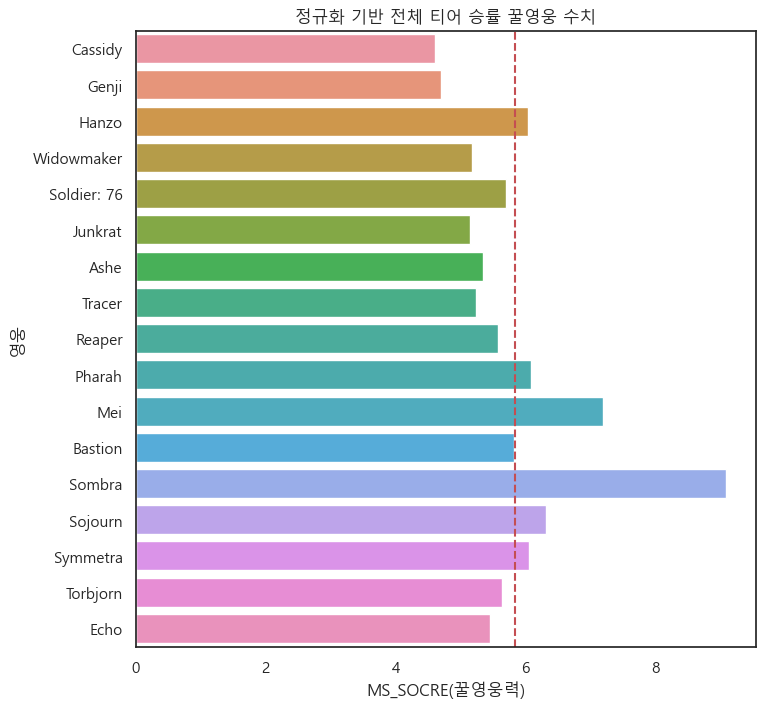

In [22]:
# 전체 티어임 ~~~ 아 모르겠다~~~ 정규화 데이터 + 승률값을 기준으로 영웅들의 평가 수치를 그리기.
KDA_ = ow2_ss0_dag["KDA Ratio"].groupby(ow2_ss0_dag["Hero"]).mean()
PICK_ = ow2_ss0_dag["Pick Rate, %"].groupby(ow2_ss0_dag["Hero"]).mean()
WIN_ = ow2_ss0_dag["Win Rate, %"].groupby(ow2_ss0_dag["Hero"]).mean()

MS_SCORE_list = []
# 정규화 승률 / (승률+픽률+KDA 비중)  print(KDA_.loc['Ashe'])
for hero in Dag_heroes :
    MS_AVG = [hero, round(KDA_.loc[hero] / (KDA_.loc[hero] + PICK_.loc[hero] + WIN_.loc[hero]) * 100, 3)]
    MS_SCORE_list.append(MS_AVG)

# 꿀 수치 기반 딜러 데이터프레임
MS_honey = pd.DataFrame(columns=['Hero', 'MS_SCORE'])
MS_honey = pd.concat([pd.Series(item, index=['Hero', 'MS_SCORE']) for item in MS_SCORE_list], axis=1).T
MS_honey_mean = MS_honey["MS_SCORE"].mean()

# 그래프 그리기
plt.figure(figsize=(8, 8))  
sb.barplot(y = 'Hero', x= 'MS_SCORE', data= MS_honey)
plt.axvline(x = MS_honey_mean, color='r', linestyle='--', label='x=5')
plt.xlabel("MS_SOCRE(꿀영웅력)")
plt.ylabel("영웅")
plt.title("정규화 기반 전체 티어 승률 꿀영웅 수치")

Text(0.5, 1.0, '정규화 기반 상위티어 승률 꿀영웅 수치')

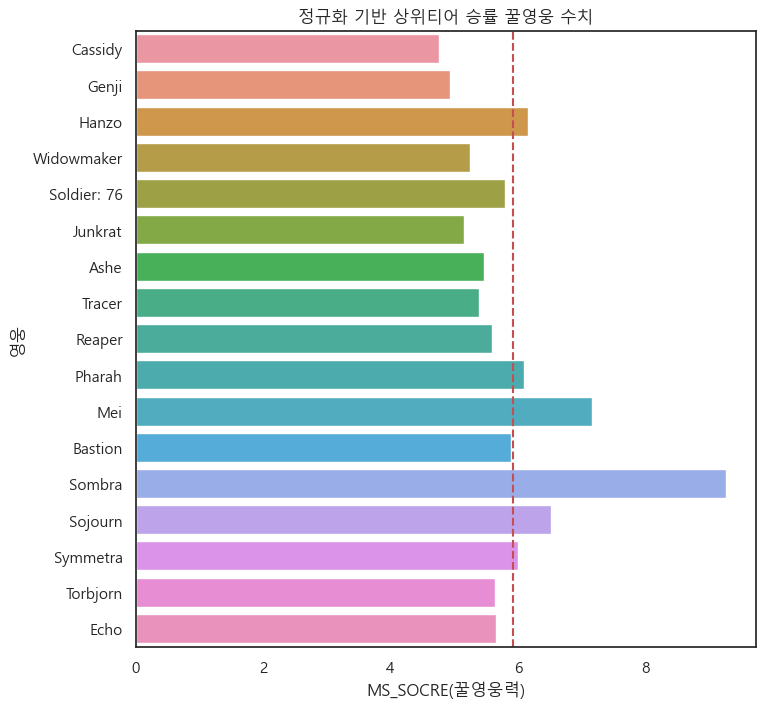

In [18]:
# 상위티어상위티어상위티어상위티어 티어임 ~~~ 아 모르겠다~~~ 정규화 데이터 + 승률값을 기준으로 영웅들의 평가 수치를 그리기.
# "Skill Tier"이 "Diamond", "Master", "Grandmaster"인 행들만 필터링
filtered_data = ow2_ss0_dag[ow2_ss0_dag['Skill Tier'].isin(high_tiers)]

# 상위 티어 "KDA Ratio"의 평균 계산
KDA_ = filtered_data.groupby('Hero')['KDA Ratio'].mean()
PICK_ = ow2_ss0_dag["Pick Rate, %"].groupby(ow2_ss0_dag["Hero"]).mean()
WIN_ = ow2_ss0_dag["Win Rate, %"].groupby(ow2_ss0_dag["Hero"]).mean()

MS_SCORE_list = []
# 정규화 승률 / (승률+픽률+KDA 비중)  print(KDA_.loc['Ashe'])
for hero in Dag_heroes :
    MS_AVG = [hero, round(KDA_.loc[hero] / (KDA_.loc[hero] + PICK_.loc[hero] + WIN_.loc[hero]) * 100, 3)]
    MS_SCORE_list.append(MS_AVG)

# 꿀 수치 기반 딜러 데이터프레임
MS_honey_high = pd.DataFrame(columns=['Hero', 'MS_SCORE'])
MS_honey_high = pd.concat([pd.Series(item, index=['Hero', 'MS_SCORE']) for item in MS_SCORE_list], axis=1).T
MS_honey_high_mean = MS_honey_high["MS_SCORE"].mean()

# 그래프 그리기
plt.figure(figsize=(8, 8))  
sb.barplot(y = 'Hero', x= 'MS_SCORE', data= MS_honey_high)
plt.axvline(x = MS_honey_high_mean, color='r', linestyle='--', label='x=5')
plt.xlabel("MS_SOCRE(꿀영웅력)")
plt.ylabel("영웅")
plt.title("정규화 기반 상위티어 승률 꿀영웅 수치")


In [ ]:
MS_honey_high.loc['MS_SCORE'].mean()

5.700411764705882

Text(0.5, 1.0, '정규화 기반 하위티어 승률 꿀영웅 수치')

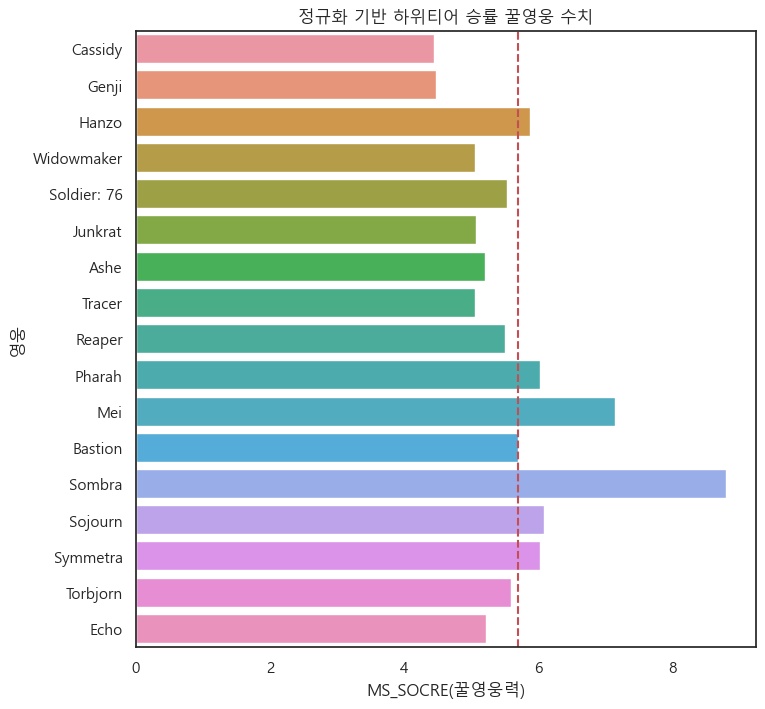

In [20]:
# 하위티어하위티어하위티어하위티어 티어임 ~~~ 아 모르겠다~~~ 정규화 데이터 + 승률값을 기준으로 영웅들의 평가 수치를 그리기.
# "Skill Tier"이 "Bronze", "Silver", "Gold", "Platinum"인 행들만 필터링
filtered_data = ow2_ss0_dag[ow2_ss0_dag['Skill Tier'].isin(low_tiers)]

# "KDARatio"의 평균 계산
KDA_ = filtered_data.groupby('Hero')['KDA Ratio'].mean()
PICK_ = ow2_ss0_dag["Pick Rate, %"].groupby(ow2_ss0_dag["Hero"]).mean()
WIN_ = ow2_ss0_dag["Win Rate, %"].groupby(ow2_ss0_dag["Hero"]).mean()

MS_SCORE_list = []
# 정규화 승률 / (승률+픽률+KDA 비중)  print(KDA_.loc['Ashe'])
for hero in Dag_heroes :
    MS_AVG = [hero, round(KDA_.loc[hero] / (KDA_.loc[hero] + PICK_.loc[hero] + WIN_.loc[hero]) * 100, 3)]
    MS_SCORE_list.append(MS_AVG)

# 꿀 수치 기반 딜러 데이터프레임
MS_honey_low = pd.DataFrame(columns=['Hero', 'MS_SCORE'])
MS_honey_low = pd.concat([pd.Series(item, index=['Hero', 'MS_SCORE']) for item in MS_SCORE_list], axis=1).T
MS_honey_low_mean = MS_honey_low["MS_SCORE"].mean()

# 그래프 그리기
plt.figure(figsize=(8, 8))  
sb.barplot(y = 'Hero', x= 'MS_SCORE', data= MS_honey_low)
plt.axvline(x = MS_honey_low_mean, color='r', linestyle='--', label='x=5')
plt.xlabel("MS_SOCRE(꿀영웅력)")
plt.ylabel("영웅")
plt.title("정규화 기반 하위티어 승률 꿀영웅 수치")
